### import part

In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### load mnist dataset and convert to float

5


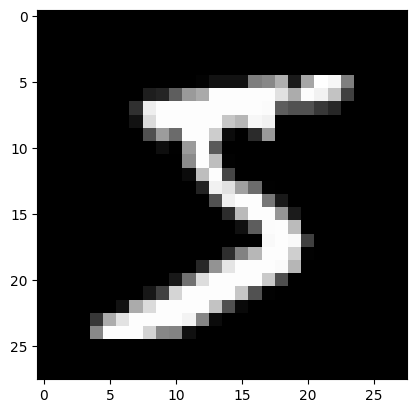

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0

plt.imshow(x_train[0], cmap = "gray")
print(y_train[0])

### Create Model using Keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = "softmax")
])

print(model.summary())

model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy", # beacuse output is vector of 10 of possibilites
    metrics= ["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Train and Evaluate the model

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2971 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1420 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1058 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0872 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0759 - accuracy: 0.9760


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0716 - accuracy: 0.9780 - 676ms/epoch - 2ms/step


[0.07164420187473297, 0.9779999852180481]

true label: 6
1/1 [==============================] - 0s 52ms/step
predicted label: 6


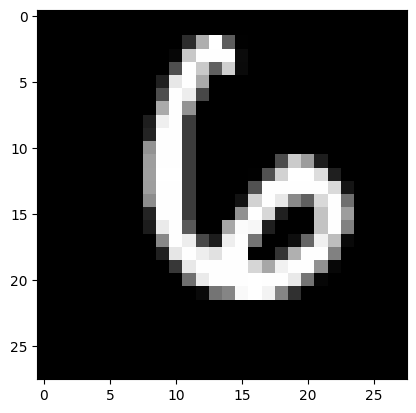

In [ ]:
print("true label: %d" % y_test[88])
plt.imshow(x_test[88], cmap="gray")

predictions = model.predict(np.reshape(x_test[88], [-1, 28,28]))
print("predicted label: %d" % np.argmax(predictions))